In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [36]:
data=pd.read_csv('titanic_dataset.csv')

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
data.shape

(891, 12)

# 2. Do all the necessary pre-processing steps 

In [41]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
data = pd.read_csv('titanic_dataset.csv', index_col='PassengerId')

In [44]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [45]:
for col in ['Cabin', 'Embarked']:
    data[col] = data[col].fillna(data[col].mode()[0])

In [62]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1.0,0.0,7.2500,2
2,1,1,0,38.0,1.0,0.0,65.6344,0
3,1,3,0,26.0,0.0,0.0,7.9250,2
4,1,1,0,35.0,1.0,0.0,53.1000,2
5,0,3,1,35.0,0.0,0.0,8.0500,2


In [60]:
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

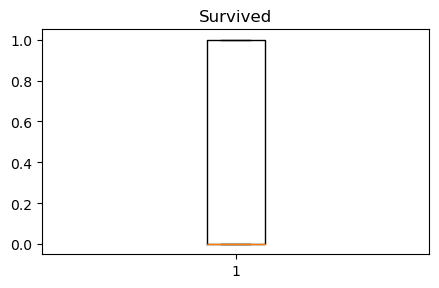

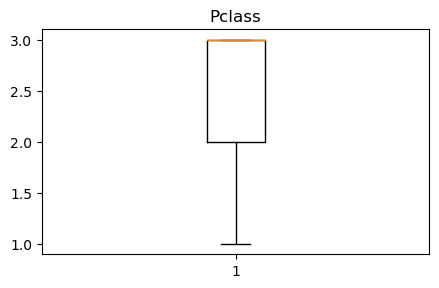

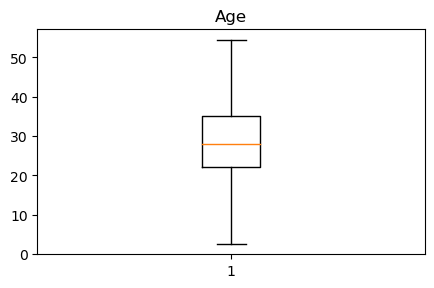

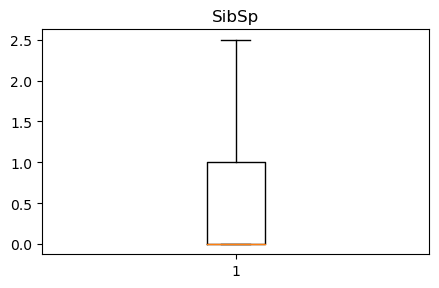

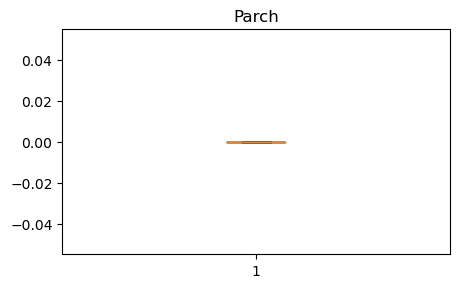

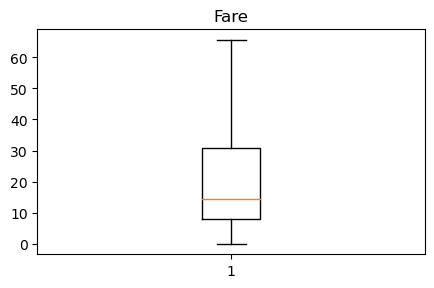

In [63]:
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for i in num_cols:
    plt.figure(figsize=(5,2.92))
    plt.boxplot(data[i])
    plt.title(i)

Q1 = 22.0
Q2 = 28.0
Q3 = 35.0
 IQR = 13.0
up_lim =  54.5
low_lim =  2.5


C:\Users\USER\AppData\Local\Temp\ipykernel_14780\3650944372.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_14780\3650944372.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_14780\3650944372.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', o

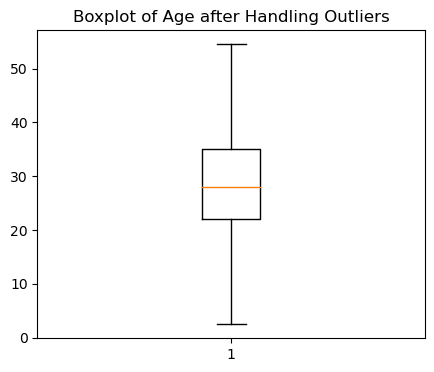

In [64]:
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

IQR = Q3 - Q1

print (' IQR =', IQR)

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

data['Age'] = np.where(data['Age'] > up_lim, up_lim, np.where(data['Age'] < low_lim, low_lim, data['Age']))

plt.figure(figsize=(5, 4))
plt.boxplot(data['Age'])
plt.title('Boxplot of Age after Handling Outliers')
plt.show()

Q1 = 0.0
Q2 = 0.0
Q3 = 1.0
 IQR = 1.0
up_lim =  2.5
low_lim =  -1.5


C:\Users\USER\AppData\Local\Temp\ipykernel_14780\2900779417.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_14780\2900779417.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_14780\2900779417.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher

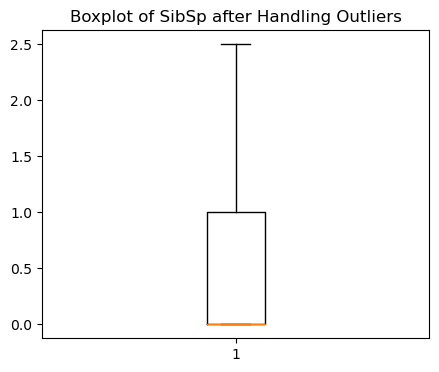

In [65]:
Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

IQR = Q3 - Q1

print (' IQR =', IQR)

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

data['SibSp'] = np.where(data['SibSp'] > up_lim, up_lim, np.where(data['SibSp'] < low_lim, low_lim, data['SibSp']))

plt.figure(figsize=(5, 4))
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp after Handling Outliers')
plt.show()

Q1 = 0.0
Q2 = 0.0
Q3 = 0.0
 IQR = 0.0
up_lim =  0.0
low_lim =  0.0


C:\Users\USER\AppData\Local\Temp\ipykernel_14780\2280388239.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Parch'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_14780\2280388239.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Parch'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_14780\2280388239.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher

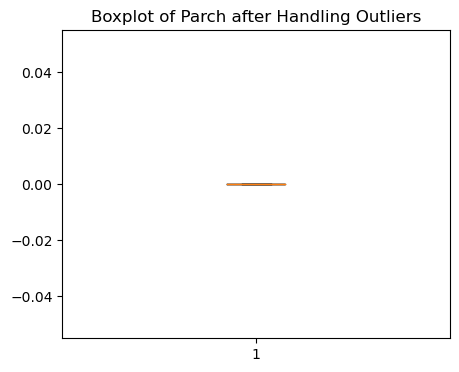

In [66]:
Q1 = np.percentile(data['Parch'],25,interpolation='midpoint')
Q2 = np.percentile(data['Parch'],50,interpolation='midpoint')
Q3 = np.percentile(data['Parch'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

IQR = Q3 - Q1

print (' IQR =', IQR)

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

data['Parch'] = np.where(data['Parch'] > up_lim, up_lim, np.where(data['Parch'] < low_lim, low_lim, data['Parch']))

plt.figure(figsize=(5, 4))
plt.boxplot(data['Parch'])
plt.title('Boxplot of Parch after Handling Outliers')
plt.show()

Q1 = 7.9104
Q2 = 14.4542
Q3 = 31.0
 IQR = 23.0896
up_lim =  65.6344
low_lim =  -26.724


C:\Users\USER\AppData\Local\Temp\ipykernel_14780\2867700951.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_14780\2867700951.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_14780\2867700951.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher',

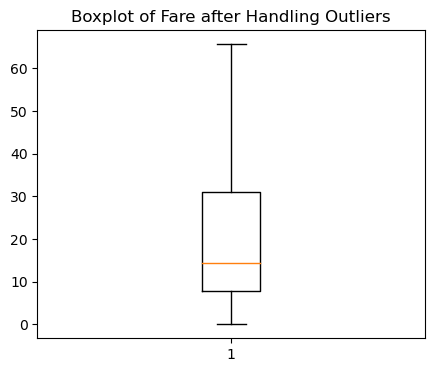

In [67]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

IQR = Q3 - Q1

print (' IQR =', IQR)

up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

data['Fare'] = np.where(data['Fare'] > up_lim, up_lim, np.where(data['Fare'] < low_lim, low_lim, data['Fare']))

plt.figure(figsize=(5, 4))
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare after Handling Outliers')
plt.show()

In [68]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [69]:
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [70]:
data['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])

data['Embarked'] = le.fit_transform(data['Embarked'])

# 3. Create kNN and SVM models 

In [72]:
X = data.drop('Survived', axis=1)     
y = data['Survived']   

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

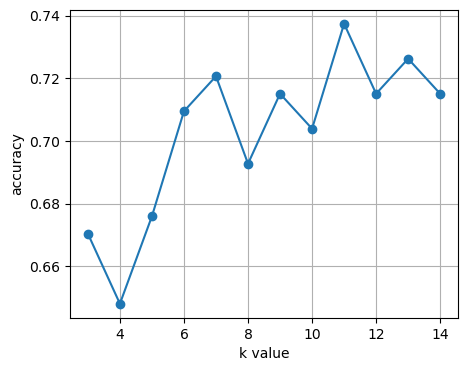

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

metric = []
neighbors = np.arange(3, 15)  # Set the desired range here

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    knn.fit(X_train,y_train)    
    y_pred_knn = knn.predict(X_test)    
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

# Plot the number of neighbors (k value) and the corresponding accuracy metric:

plt.figure(figsize=(5,4))
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [77]:
knn = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski',p=2)
knn.fit(X_train,y_train)   
y_pred_knn = knn.predict(X_test)   
print('Accuracy = ',accuracy_score(y_test,y_pred_knn)) 

Accuracy =  0.7374301675977654


In [81]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.7821229050279329


# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models 

In [91]:
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold

kfold_validation = KFold(11)
kfcv_results_knn = cross_val_score(knn,X,y,cv= kfold_validation)
kfcv_results_knn , np.mean(kfcv_results_knn)

print("kNN Average Accuracy KFold_Std:", np.mean(kfcv_results_knn))

kNN Average Accuracy KFold_Std: 0.7138047138047137


In [92]:
skfold_validator = StratifiedKFold(n_splits=11)
scv_results_knn = cross_val_score(knn,X,y,cv= skfold_validator)
scv_results_knn , np.mean(scv_results_knn)

print("kNN Average Accuracy Stratified:", np.mean(scv_results_knn))

kNN Average Accuracy Stratified: 0.7093153759820425


In [93]:
kfold_validation = KFold(11)
kfcv_results_svm = cross_val_score(svm,X,y,cv= kfold_validation)
kfcv_results_svm , np.mean(kfcv_results_svm)

print("SVM Average Accuracy KFold:", np.mean(kfcv_results_svm))

SVM Average Accuracy KFold: 0.7867564534231201


In [94]:
skfold_validator = StratifiedKFold(n_splits=11)
scv_results_svm = cross_val_score(svm,X,y,cv= skfold_validator)
scv_results_svm , np.mean(scv_results_svm)

print("SVM Average Accuracy Stratified:", np.mean(scv_results_svm))

SVM Average Accuracy Stratified: 0.7867564534231201
